# The California Housing DataSet Analysis

### Downloading The Data

In [1]:
# Fetching the data 

import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets" , "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL , housing_path = HOUSING_PATH):
    os.makedirs(housing_path , exist_ok = True)
    tgz_path = os.path.join(housing_path , "housing.tgz")
    urllib.request.urlretrieve(housing_url , tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def loading_housing_data(housing_path = HOUSING_PATH) :
    csv_path = os.path.join(housing_path , "housing.csv")
    return pd.read_csv(csv_path)



In [4]:
housing = loading_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


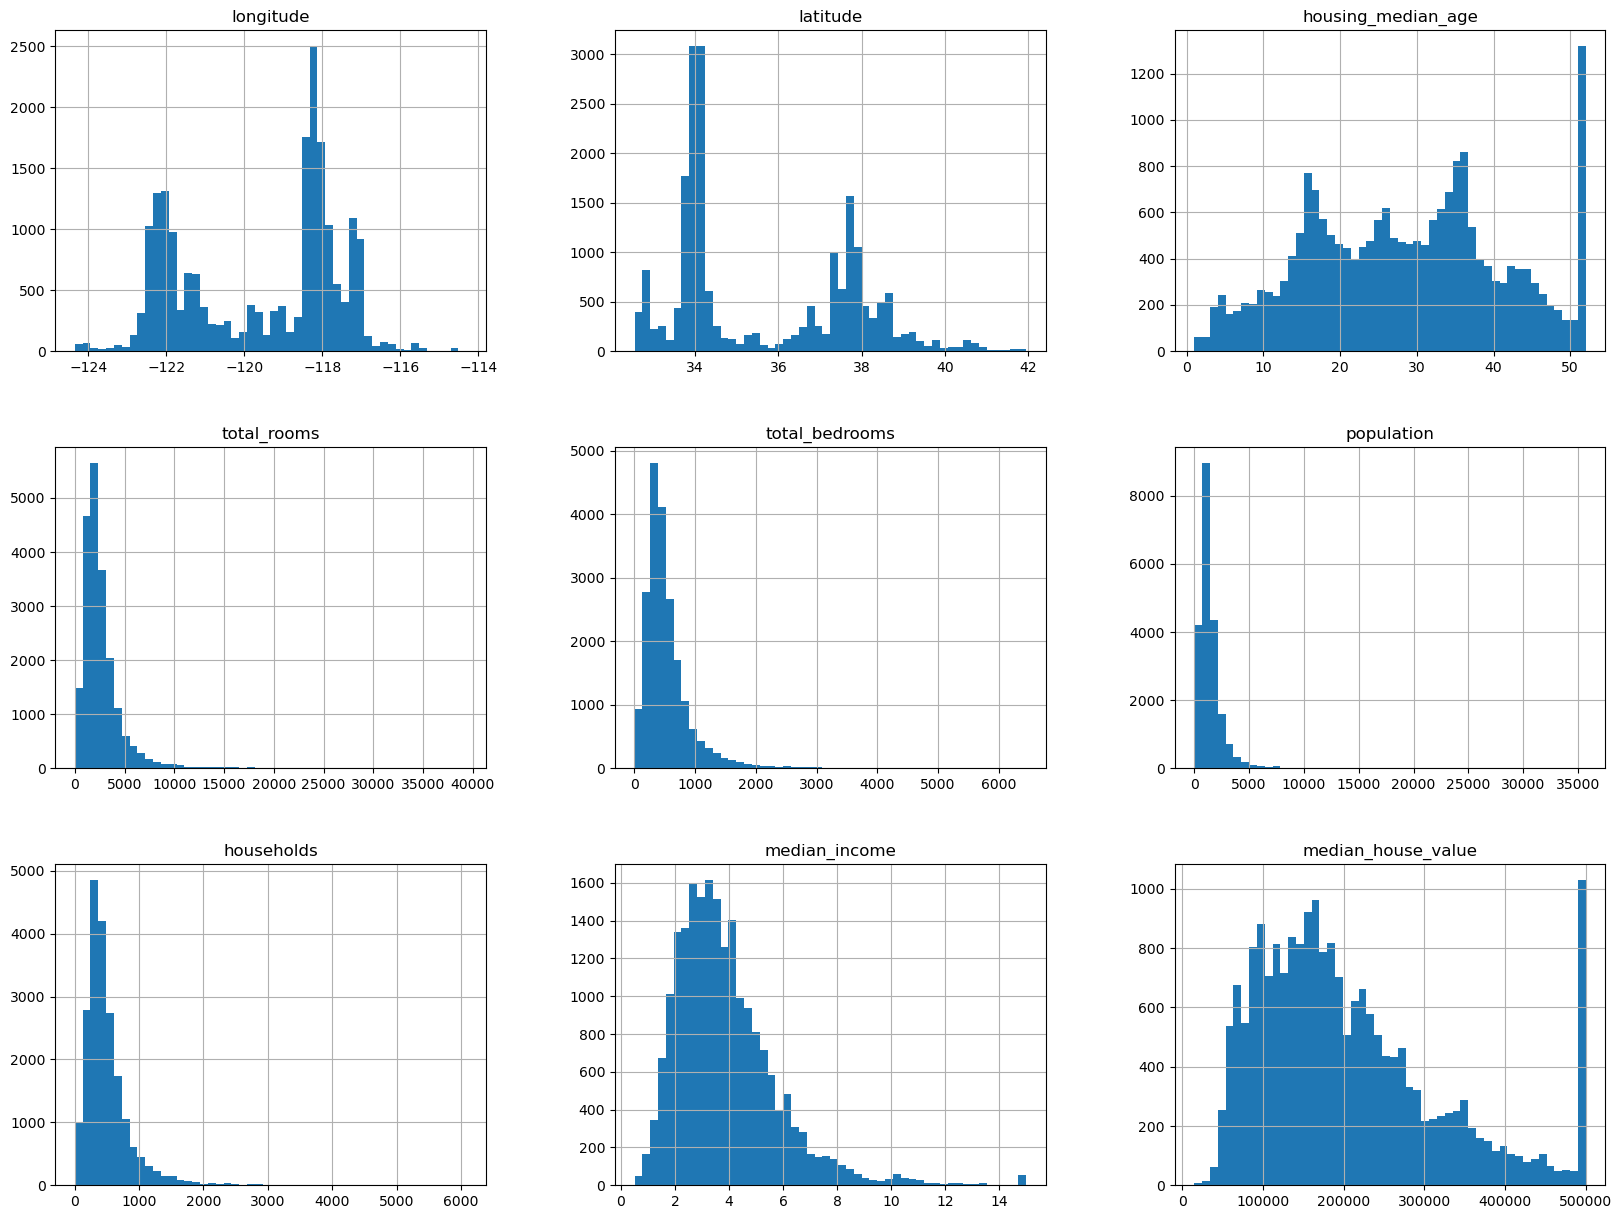

In [8]:
# ploting the garph

%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins = 50 , figsize = (20,15))
plt.savefig("housing_histogram.png");
plt.show()


In [9]:
# creating an new category called income category because median income is very important attribute to predict the median housing price.
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"] , bins = [0,1.5,3.0,4.5,6.0 ,np.inf] , labels = [1,2,3,4,5])

<Axes: >

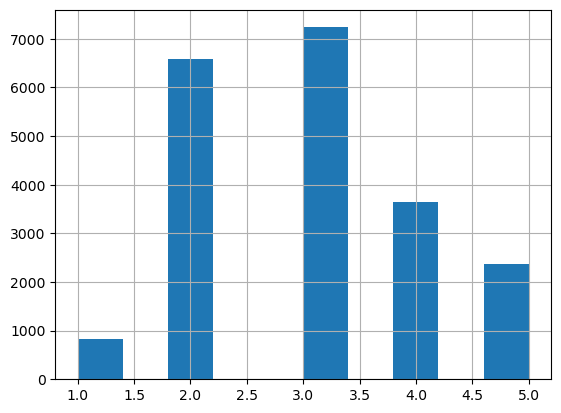

In [10]:
housing["income_cat"].hist()

### Creating the Test Set

In [11]:
# spliting the data

from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)

In [12]:
#stratifying the sample data

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state =42)
for train_index , test_index in split.split(housing , housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
for set in (strat_train_set , strat_test_set) :
    set.drop("income_cat" , axis = 1 , inplace = True)

In [15]:
housing = strat_train_set.copy()

### Visualizing The Data

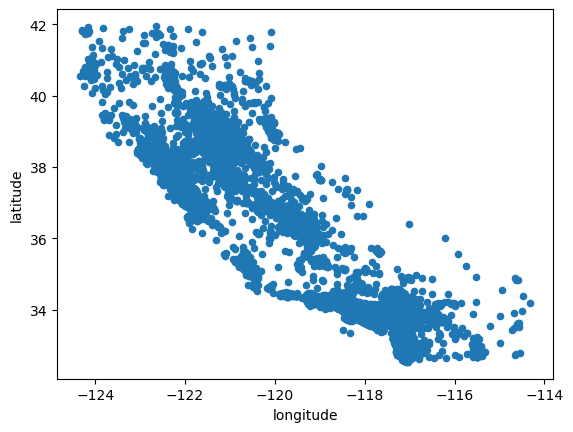

In [16]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude")
plt.savefig("bad_visualization");

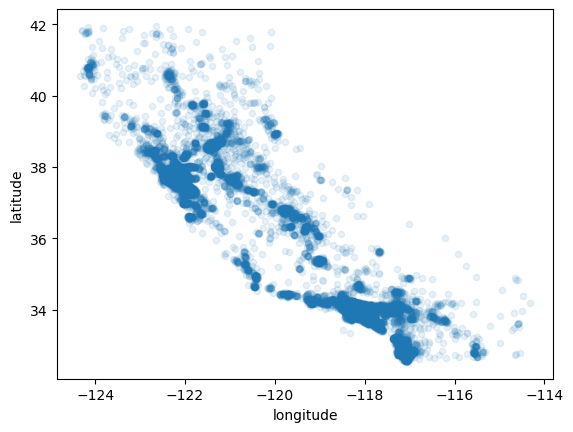

In [17]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude",alpha = 0.1)
plt.savefig("good_visualization");

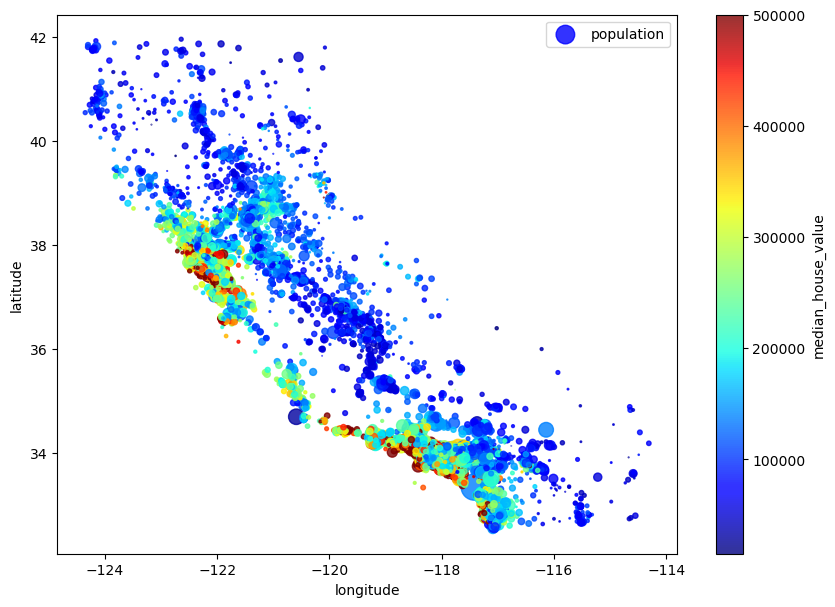

In [18]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude",alpha = 0.8 , s = housing["population"]/100 , label = "population" , figsize=(10,7),c = "median_house_value" , cmap = plt.get_cmap("jet") , colorbar = True)
plt.legend()
plt.savefig("housing_price_scatter");



### Looking for Correlations

In [19]:
housing['ocean_proximity'] = pd.to_numeric(housing['ocean_proximity'] , errors = 'coerce')   # converts the non numeric values into NaN values
corr_matrix = housing.corr()

In [20]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
ocean_proximity            NaN
Name: median_house_value, dtype: float64

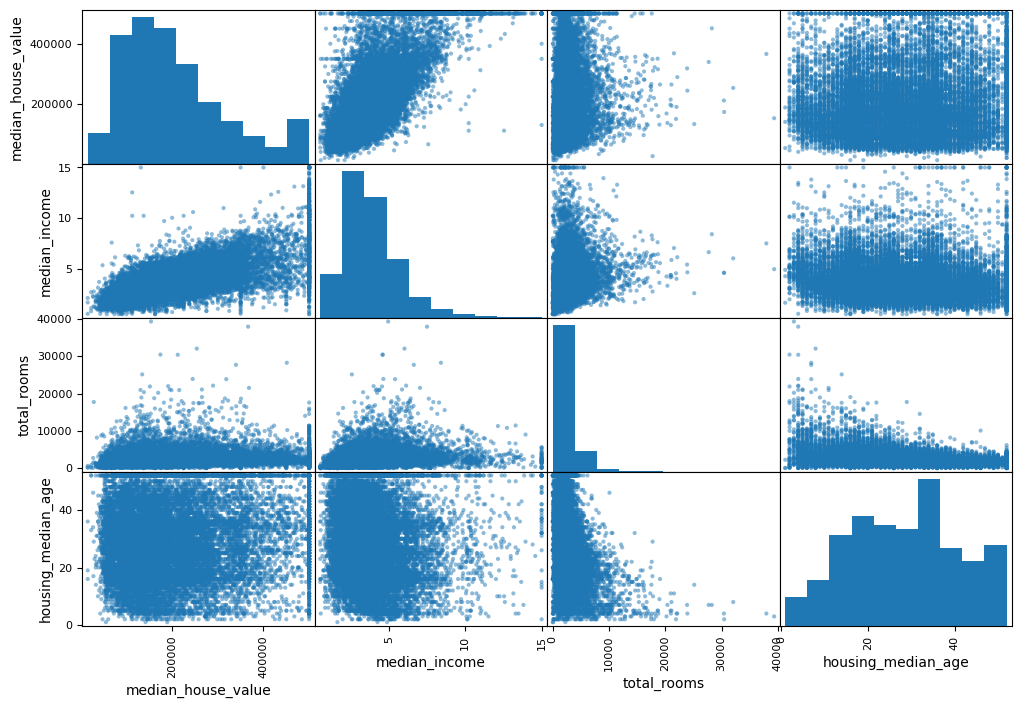

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes] , figsize = (12,8));
plt.savefig("The_correlation_between_attributes");

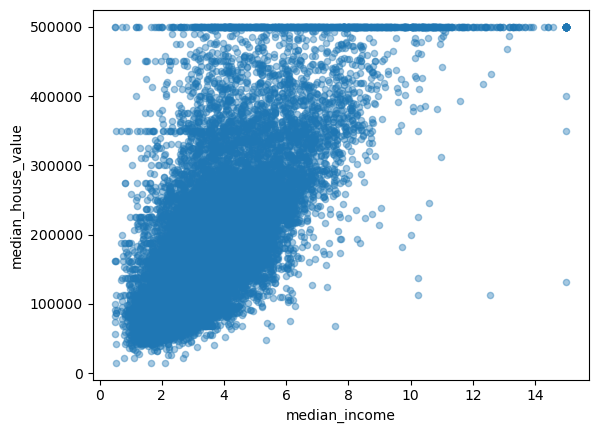

In [22]:
housing.plot(kind = "scatter" , x = "median_income" , y = "median_house_value" , alpha = 0.4);
plt.savefig("The_correlation_between_median_house_value_and_median_income");

### Experimenting with Attribute Combinations

In [23]:
housing["rooms_per_houshold"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_houshold          0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
ocean_proximity                  NaN
Name: median_house_value, dtype: float64

### Data Cleaning

In [25]:
strat_train_set = strat_train_set[strat_train_set['ocean_proximity'] != 'ISLAND']
housing = strat_train_set.drop("median_house_value" , axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [26]:
# option 1 

# housing.dropna(subset = ["total_bedrooms"])

#option 2

# housing.drop("total_bedrooms" , axis = 1)

#option 3 

# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median , inplace = True)

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

In [28]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### Handling Text and Categorical Attributes

In [104]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder  = OneHotEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

<10x4 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [31]:
housing_cat_encoded.toarray()

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

### Custom Transformers

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

#### Transformation Pipelines

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy = 'median')),
    ('attr_adder' , CombinedAttributesAdder()),
    ('std_scaler' , StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [34]:
housing = housing[housing['ocean_proximity'] != 'ISLAND']

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num" , num_pipeline , num_attribs),
    ("cat" , OneHotEncoder() , cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

#### Training and Evaluating on the Training Set

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X = housing_prepared , y = housing_labels)

LinearRegression()

In [37]:
some_data = housing.iloc[:7]
some_label = housing_labels.iloc[:7]


In [38]:
some_data_num = some_data.drop('ocean_proximity' , axis = 1)
some_data_cat = some_data[["ocean_proximity"]]

some_num_attribs = list(some_data_num)
some_cat_attribs = ['ocean_proximity']

some_full_pipeline = ColumnTransformer([
    ("some_num" , num_pipeline , some_num_attribs),
    ("some_cat" , OneHotEncoder() , some_cat_attribs)
])
some_prepared = some_full_pipeline.fit_transform(some_data)

In [39]:
print("Predictions :" , lin_reg.predict(some_prepared))

Predictions : [ 74779.18697358 301413.48072224 133370.05781356 181689.23218218
 225978.20226996 176586.67594946 366431.90942473]


In [46]:
print("Labels :" , list(some_label))

Labels : [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0]


In [49]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels , housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68630.25669754331

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared , housing_labels)

DecisionTreeRegressor()

In [53]:
housing_prediction = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels , housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg , housing_prepared , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([72566.99945134, 70466.85379315, 69512.41451496, 71908.20989763,
       70368.92465967, 77726.678228  , 71233.50093974, 72240.94692847,
       68253.03605519, 71875.75190795])

In [59]:
print("Mean : " , tree_rmse_scores.mean())
print("Std : " , tree_rmse_scores.std())

Mean :  71615.33163761055
Std :  2398.8505177290044


In [60]:
lin_scores = cross_val_score(lin_reg , housing_prepared , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([71777.95590305, 64095.90763427, 67772.17795537, 68634.98348959,
       66846.11396078, 72527.71547015, 74000.14330332, 68802.06486889,
       66442.74860603, 70139.2121071 ])

In [61]:
print('Mean : ' , lin_rmse_scores.mean())
print('Std : ' , lin_rmse_scores.std())

Mean :  69103.90232985544
Std :  2885.5145088992977


In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_labels)

RandomForestRegressor()

In [65]:
forest_scores = cross_val_score(forest_reg , housing_prepared , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
forest_rmse = np.sqrt(-forest_scores)
forest_rmse

array([51558.77802605, 49203.07311639, 47024.42889162, 51898.43880045,
       47581.07968772, 51786.79021601, 52387.27858711, 49796.34557022,
       48599.29432958, 53954.97530659])

In [67]:
print('Mean : ' , forest_rmse.mean())
print('Std : ' , forest_rmse.std())

Mean :  50379.04825317629
Std :  2155.791592277779


## Fine-Tune Your Model

#### Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30] , 'max_features' : [2,4,6,8] },
    {'bootstrap':[False] , 'n_estimators':[3,10] , 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring = 'neg_mean_squared_error' , return_train_score = True)

grid_search.fit(housing_prepared , housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [83]:
a = grid_search.best_estimator_
print(a)

RandomForestRegressor(max_features=6, n_estimators=30)


In [84]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62752.283642952614 {'max_features': 2, 'n_estimators': 3}
54975.44148082575 {'max_features': 2, 'n_estimators': 10}
52550.18049439443 {'max_features': 2, 'n_estimators': 30}
59490.84201085357 {'max_features': 4, 'n_estimators': 3}
52521.89695861985 {'max_features': 4, 'n_estimators': 10}
50288.036883590976 {'max_features': 4, 'n_estimators': 30}
59101.11222507717 {'max_features': 6, 'n_estimators': 3}
52555.453309891374 {'max_features': 6, 'n_estimators': 10}
49929.52382753967 {'max_features': 6, 'n_estimators': 30}
59254.91526530412 {'max_features': 8, 'n_estimators': 3}
52249.79856552648 {'max_features': 8, 'n_estimators': 10}
50194.32068652708 {'max_features': 8, 'n_estimators': 30}
61656.72916240485 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54139.40993256016 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58047.530163970296 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52204.1264518039 {'bootstrap': False, 'max_features': 3, 'n_estimators':

### Analyze the Best Models and Their Errors

In [86]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06946074, 0.06822837, 0.04176556, 0.01735906, 0.01634217,
       0.01746789, 0.01453199, 0.36719604, 0.04886586, 0.10924024,
       0.05372832, 0.00676972, 0.16310808, 0.00229773, 0.00363823])

In [89]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

### Evaluate Your System on the Test Set

In [95]:
final_model = grid_search.best_estimator_

strat_test_set = strat_test_set[strat_test_set['ocean_proximity'] != 'ISLAND']

X_test = strat_test_set.drop("median_house_value" , axis = 1)
X_test = X_test[X_test['ocean_proximity'] != 'ISLAND']
Y_test = strat_test_set["median_house_value"]

X_prepared = full_pipeline.transform(X_test)

final_prediction = final_model.predict(X_prepared)

final_prediction_mse = mean_squared_error(Y_test , final_prediction)
final_prediction_rmse = np.sqrt(final_prediction_mse)

final_prediction_rmse


47717.9239201663

### Saving The Model And Loading The Model

In [97]:
import joblib

joblib.dump(final_model , "final_model.pkl")

['final_model.pkl']

In [98]:
model_loaded = joblib.load('final_model.pkl')

In [99]:
loaded_prediction = model_loaded.predict(X_prepared)

In [102]:
print("output while training : " , final_prediction[:5])
print("output while loaded : " , loaded_prediction[:5])

output while training :  [486977.43333333 241776.73333333 203430.         163200.
 252800.        ]
output while loaded :  [486977.43333333 241776.73333333 203430.         163200.
 252800.        ]
